<img src="Lapage.png" alt="Lapage" width=250 height=250>

<!DOCTYPE html>
<h1 style="color:Black;font-size:300%;text-align:center;">Projet 6</h1>
<p  style="color:Black;font-size:300%;text-align:center;">Analysez les ventes d'une librairie</p>
<p  style="color:Black;font-size:200%;text-align:start;">Sommaire</p>

<p style="color:Black;font-size:150%;text-align:start;"><a href="#1">   Introduction</a></p>

<p style="color:Black;font-size:150%;text-align:start;"><a href="#2">I. Exploration et nettoyage des données</a></p>
<ol> 
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#3"> Préparation du fichier client</a></li>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#4"> Préaration du fichier produit</a></li>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#5"> Préparation du fichier transaction</a></li>
</ol> 
 
<p style="color:Black;font-size:150%;text-align:start;"><a href="#6">II. Fusionner les DataFrames</a></p>
<ol>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#7"> Fusionner les dataframes transactions, clients et produits</a></li>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#8"> Imputation des valeurs manquantes</a></li>
    <li style="color:Black;font-size:150%;text-align:start;"><a href="#9"> Exporter le fichier final</a></li>
</ol> 
<p style="color:Black;font-size:150%;text-align:start;"><a href="#10">Conclusion</a></p>


<h2 ><a id="1">Introduction</a></h2>
<p>
    
En tant que consultant Data Analyst chez Lapage, une grande librairie généraliste en ligne très réputée. Lapage était une librairie physique avec plusieurs points de vente, face au succès de certains de ses produits et l'engouement de ses clients, elle met en place un site de vente en ligne.

Notre mission conssite à : 
- analyser les points forts;
- analyser les points faibles;
- analyser les comportements clients sur le site.

Pour mener à bien la mission, nous allons prendre connaissance des différentes interpellations des collègues du service marketing afin d'apporter des réponses concrètes.
    
</p>

In [1]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import datetime as dt

Définition des fonctions pour vérifier les doublons et les valeurs nulles

In [2]:
#Créer uue fonction permettant de verifier les valeurs manquantes d'une variable et de nous renvoyer le cas-echéant le nombre de valeurs manquantes.
def valeur_nulle(table,colonne):
    if len(table[table[colonne].isnull()])==0:
        print("pas de valeur nulle")
    else:
        print(len(table[table[colonne].isnull()]))     

In [3]:
#Créer uue fonction permettant de verifier les doublons d'une variable et de nous renvoyer le nombre de doublons et le nombre de valeur unique.
def doublons(table,colonne):
    for x in table[colonne]:
        if not x in table[colonne]:
             return table[colonne].duplicated().value_counts()  

<h2 ><a id="2">I. Exploration et Nettoyage des données</a></h2>

L'objectif de cette partie est de bien comprendre les données avant de les analyser.

<h3 ><a id="3"> 1. Préparation du fichier clients</a></h3>

In [4]:
clients = pd.read_csv("customers.csv")
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Le fichier clients est un dataframe composé de trois (3) variables et de 8623 individus. Les variables sont : 
- *client_id*: est une variable de type chaine de carectére qui permet d'identifier les clients.
- *sex*: une variable de type chaine de caractère qui permet d'identifier le genre du client.
- *birth*: une variable de type integer qui indique l'année de naissance du client.

#### Analyser la variable client_id

La variable client_id est une clé primaire potentielle. Une clé primaire doit etre unique et ne doit pas avoir une valeure nulle.  
Nous allons vérifier que la variable *client_id* réponde aux caractéristiques d'une clé primaire.

In [6]:
valeur_nulle(clients,"client_id")

pas de valeur nulle


In [7]:
doublons(clients,"client_id")

False    8623
Name: client_id, dtype: int64

**La variable client_id ne comporte pas de valeur nulle et n'a pas de doublons. Donc la variable client_id est considérée comme clé primaire de la table clients.**

In [8]:
# Detecter les clients tests
clients[-clients["client_id"].str.startswith("c_")]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


On constate qu'il ya des clients dont leurs identifiants sont ct_0 et ct_1 qui sont differents du format d'identification des clients. Ces identifiants sont utilisés dans le cadre d'un test et sont donc considérés comme des clients tests. Nous allons supprimé les clients tests pour la suite de notre analyse.   

In [9]:
clients.drop([2735,8494], axis = 0, inplace=True)
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### Analyser la variable sexe  

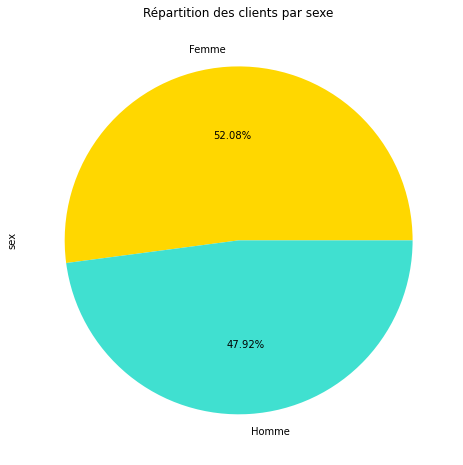

In [40]:
plt.figure(figsize =(12,8))
label = ["Femme","Homme"]
color = ["gold","turquoise"]
clients["sex"].value_counts().plot(kind="pie",autopct = "%1.2f%%", labels=label,colors=color)
plt.title("Répartition des clients par sexe")
plt.show()

- **La variable sexe est composée de deux categories homme et femme.** 
- **Les femmes represnetent 52,08% contre 47,92% d'hommes.**

#### Analyser la variable birth
La variable birth indique l'année de naissance des clients.

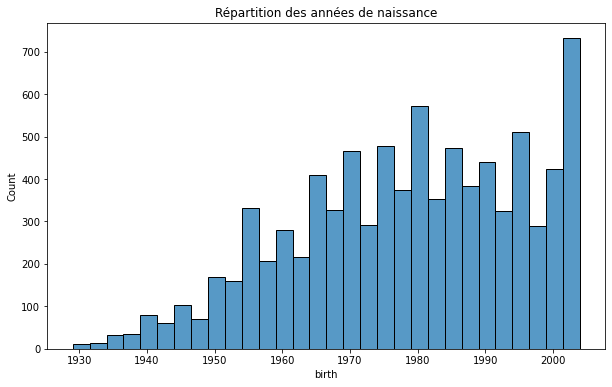

Année de naissance minimun : 1929
Année de naissance maximun: 2004


In [11]:
plt.figure(figsize =(10,6))
sns.histplot(clients["birth"])
plt.title("Répartition des années de naissance")
plt.show()

print("Année de naissance minimun :",clients.birth.min())
print("Année de naissance maximun:",clients.birth.max())

- **La variable birth contient 76 année de naissance comprise entre 1929 et 2004.**
- **Les clients nés en 2004 sont plus nombreux (700).**

,client_id,sex,birth,age_client
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


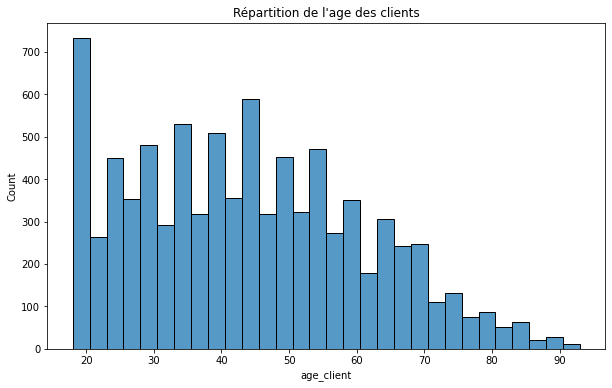

L'age min est de  18 ans
L'age max est de  93 ans


In [12]:
# On va ajouter au fichier clients une colonnes age qui determine l'age des clients.
clients["age_client"]= dt.date.today().year - clients["birth"]
display(clients.head())

#Representation graphique des ages
plt.figure(figsize =(10,6))
sns.histplot(clients["age_client"])
plt.title("Répartition de l'age des clients")
plt.show()

print("L'age min est de ",clients["age_client"].min(),"ans")
print("L'age max est de ",clients["age_client"].max(),"ans")


- **L'age des clients est compris entre 18 ans et 93 ans.**
- **Les clients agés de 18 ans sont plus représentatifs.**

In [13]:
# Grouper l'age de client en tranche d'age
labels = ["15 - 25ans","26 - 35ans","36 - 45ans","46 - 55ans","56 - 65ans","66 - 75ans","76 - plus"]
clients["tranche_d'age"]= pd.cut(clients["age_client"], bins=[15,25,35,45,55,65,75,85], labels=labels)
clients.head()

,client_id,sex,birth,age_client,tranche_d'age
0,c_4410,f,1967,55,46 - 55ans
1,c_7839,f,1975,47,46 - 55ans
2,c_1699,f,1984,38,36 - 45ans
3,c_5961,f,1962,60,56 - 65ans
4,c_5320,m,1943,79,76 - plus


<h3 ><a id="4"> 2. Préparation du fichier produit</a></h3>

In [14]:
produits = pd.read_csv("products.csv")
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [15]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


**Analyser le fichier products**

Le fichier products est un dataframe composé de trois (3) variables et de 3286 individus. Les variables sont : 
- *id_prod*: est une variable de type chaine de carectére qui permet d'identifier les differents produits. Elle ne doit pas être nulle, ne doit pas avoir de doublon et doit être unique.
- *price*: une variable de type float qui determine les prix des produits.
- *categ*: une variable de type integer qui indique la catégorie qu'appartiennent les produits. On distingue 3 catégories de produits à savoir 0,1 et 2.

#### Analyser la variable id_prod

La variable id_prod permett d'identifier le produit de facon unique. Il est concideré comme une clé candidate.  
Nous allons verifier les condition d'une clé primaire.

In [16]:
#Vérifier l'existance de doublon de la variable id_prod.
doublons(produits,"id_prod")

False    3287
Name: id_prod, dtype: int64

In [17]:
valeur_nulle(produits,"id_prod")

pas de valeur nulle


**La variable *id_prod* n'a pas de doublon donc elle est unique, en plus elle ne comporte pas de valeur nulle. Donc elle est considerée comme la clé primaire du fichier products.**

#### Analyser la variable Prix

La variable prix indique le prix des produits 

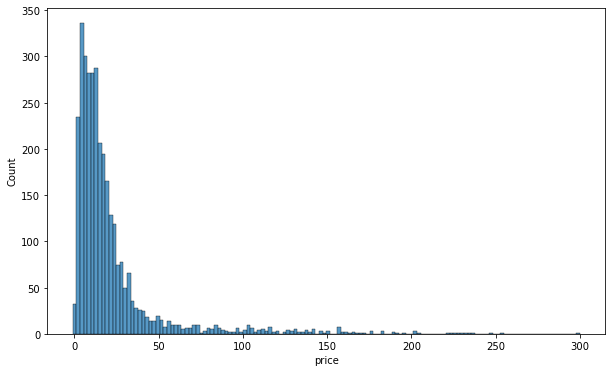

In [18]:
plt.figure(figsize =(10,6))
sns.histplot(produits["price"])
plt.show()

In [19]:
produits.describe()["price"]

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

- Le prix maximum est de 300.
- La moyenne des prix est de 21,85 qui trop éloignée du prix max 
- L'ecart type du prix est 29,84. Ce qui veux dire qu'il existe probablement des outliers.
- Le prix minimum est de -1 qui est negatif ce qui n'est pas normal. Nous allons identifier le produit correspondant.

In [20]:
#Identification des produits dont le prix est inferieur ou egal à zero
produits.loc[produits["price"]<=0]

,id_prod,price,categ
731,T_0,-1.0,0


**Le produit dont le prix est négatif est identifié par T_0 qui corespont a un produit test, nous allons supprimer ce produit.**

In [21]:
# Supprimer le produit test
produits.drop(produits.loc[produits["id_prod"] == "T_0"].index, inplace = True)
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


**Analyser la variable price afin de detecter les outliers et les lister**  *


In [22]:
# Definir une limite 
seuil = 2
# Calculer la moyenne et l'ecart type de la variable prix
moyenne_prix = produits["price"].mean()
ecart_type_prix = produits["price"].std()
#Faire une boucle for pour lister les outliers et afficher le nombre d'outliers
outliers = []
for i in produits["price"]:
    score_z = (i-moyenne_prix )/ecart_type_prix
    if score_z > seuil:
        outliers.append(i)
print("Les outliers sont au nombre de ", len(outliers))

seuil_prix_normal = (ecart_type_prix*2)+moyenne_prix
print("Le seuil des prix normaux est de ", round(seuil_prix_normal,2))

Les outliers sont au nombre de  157
Le seuil des prix normaux est de  81.56


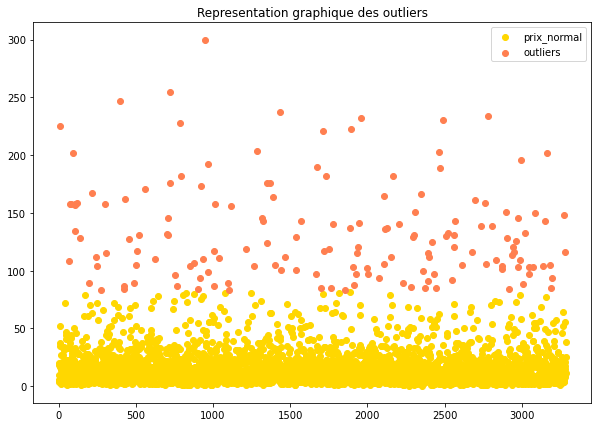

In [23]:
#Représenter les outliers par le graphique nuages de points
outliers = produits.loc[produits["price"]>round(seuil_prix_normal,2)]
normal = produits.loc[produits["price"]<round(seuil_prix_normal,2)]
plt.figure(figsize = (10,7))
plt.scatter(normal['price'].index,normal['price'].values, c="gold", label= "prix_normal")
plt.scatter(outliers['price'].index, outliers['price'].values, c="coral", label = "outliers") 
plt.title("Representation graphique des outliers")
plt.legend()
plt.show()

#### Analyser la variable categ

La variable categorie indique les differentes catégories de produit.

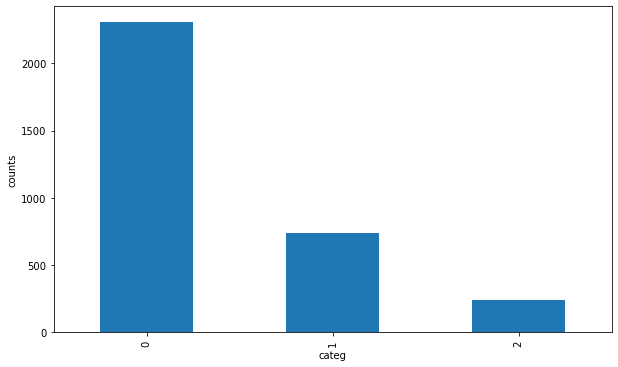

In [24]:
plt.figure(figsize =(10,6))
#sns.histplot(produits["categ"])
produits["categ"].value_counts().plot(kind="bar")
plt.ylabel("counts")
plt.xlabel("categ")
plt.show()

- **La variable categ comporte trois types de categories de produit 0, 1 et 2.**
- **Les produits de categories 0 sont les plus nombreux.**

<h3 ><a id="5">3. Préparation du fichier transactions</a></h3>

In [25]:
ventes = pd.read_csv("transactions.csv")
ventes.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [26]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


**Analyser le fichier transaction**

Le fichier transaction est un dataframe composé de trois (4) variables et de 679531 individus. Les variables sont : 
- *id_prod*: une clé étrangère permet de faire la liaison avec la table products.
- *client_id*: une clé étrangère permet de faire la liaison avec la table customers.
- *session_id*: une variable de type chaine de caractère qui identifie l'accès d'un client sur le site.
- *date*: une variable de type chaine de caractère qui indique la date et l'heure à laquelle le client est connecté sur le site.  
Nous allons identifié les produits identifier par T_0 et les ecraser.


In [27]:
# Identifier les produits tests du fichier transaction
ventes.loc[ventes["id_prod"] == "T_0"]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


**La variable date permet de voir que le produit identifié par T_O est un produit test. Alors on va les écraser pour la suite.** 

In [28]:
ventes = ventes.loc[ventes["id_prod"] != "T_0"]
ventes.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


**Convertir la variable "date" au format date**  
Pour convertir la variable "date" qui est de type chaine de caractére au format date, nous allons utiliser la fonction to_datetime.

In [29]:
#ventes["heure"] = pd.to_datetime(ventes["date"]).dt.time
#ventes["date"] = pd.to_datetime(ventes["date"]).dt.date
ventes["heure"] = pd.to_datetime(ventes["date"]).dt.time
ventes["date"] = pd.to_datetime(ventes["date"]).dt.date
ventes["date"] = pd.to_datetime(ventes["date"], format = "%Y-%m-%d %H:%M:%S")
ventes.head()

,id_prod,date,session_id,client_id,heure
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479


<h2 ><a id="6"> II. Fusionner les dataframes</a></h2> 

Pour poursuivre notre analyse, nous allons fusionner les different Dataframe et exporter le fichier final dans notre dossier de travail.

<h3 ><a id="7">1. Fusionner les dataframes transaction, clients et produits</a></h3> 

In [30]:
df_final = ventes.merge(clients, how = "left" , on = "client_id").merge( produits, how = "left",on = "id_prod")
df_final.head()

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,36,36 - 45ans,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,34,26 - 35ans,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,54,46 - 55ans,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,22,15 - 25ans,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,42,36 - 45ans,4.99,0.0


In [31]:
valeur_nulle(df_final,"price")

221


**La variable "price" comporte un nombre important de valeur manquante(242).**

In [32]:
df_final.loc[df_final["price"].isnull()]

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,07:22:38.636773,m,1940,82,76 - plus,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,09:24:14.133889,f,1963,59,56 - 65ans,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,03:26:35.696673,m,1978,44,36 - 45ans,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,11:33:25.481411,m,1991,31,26 - 35ans,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,05:53:01.627491,m,1973,49,46 - 55ans,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,09:06:03.504061,m,1981,41,36 - 45ans,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,19:59:19.462288,f,1979,43,36 - 45ans,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,11:35:20.319501,m,1981,41,36 - 45ans,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,09:05:43.952857,m,1986,36,36 - 45ans,NaN,NaN


**Les valeurs manquantes au niveau des variables price et categ correspondent à un produit identifier par 0_2245**

<h3 ><a id="8">2. Imputation par la moyenne des valeurs manquantes</a></h3> 

On constate des valeurs manquantes au niveau du prix et de la catégorie pour le produit 0_2245.
Le produit appartient à la catégorie 0 donc les valeurs manquantes de la variable catégorie seront remplacées par 0.   
Le produit a été acheté par un nombre important de clients de tous genres et de différents âges. Comme le produit n'est probablement gratuit donc il ne peut pas prendre la valeur 0 par conséquent nous allons remplacer les valeurs manquantes par la  moyenne des prix.

In [33]:
#Calcuer la moyenne des prix
moyenne = round(df_final.loc[df_final["categ"]==0]["price"].mean(),2)
moyenne

10.64

In [34]:
#Remplacer les valeurs manquantes de la variable catégorie par 0
df_final["categ"].fillna(0, inplace = True)
df_final.head()

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,36,36 - 45ans,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,34,26 - 35ans,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,54,46 - 55ans,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,22,15 - 25ans,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,42,36 - 45ans,4.99,0.0


In [35]:
#Remplacer les valeurs manquantes de la variable prix par la moyenne des prix.
df_final["price"].fillna(moyenne, inplace = True)
df_final.head()

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,36,36 - 45ans,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,34,26 - 35ans,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,54,46 - 55ans,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,22,15 - 25ans,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,42,36 - 45ans,4.99,0.0


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_prod        679332 non-null  object        
 1   date           679332 non-null  datetime64[ns]
 2   session_id     679332 non-null  object        
 3   client_id      679332 non-null  object        
 4   heure          679332 non-null  object        
 5   sex            679332 non-null  object        
 6   birth          679332 non-null  int64         
 7   age_client     679332 non-null  int64         
 8   tranche_d'age  676513 non-null  category      
 9   price          679332 non-null  float64       
 10  categ          679332 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 57.7+ MB


In [37]:
#Convertir les variables "birth" et "categ" qui sont de type float en type intiger
df_final["birth"]= df_final["birth"].astype("int64")
df_final["categ"]= df_final["categ"].astype("int64")
df_final["age_client"]= df_final["age_client"].astype("int64")
df_final.head()

,id_prod,date,session_id,client_id,heure,sex,birth,age_client,tranche_d'age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,36,36 - 45ans,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,34,26 - 35ans,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,54,46 - 55ans,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,22,15 - 25ans,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,42,36 - 45ans,4.99,0


<h3 ><a id="9">3. Exporter le fichier base dans le dossier de travail</a></h3> 

In [38]:
 df_final.to_csv("df_final.csv", index = False)

<h2 ><a id="1O">Conclusion</a></h2>

Dans cette premiére partie, nous avons procéder à l'analyse et à l'explorartion des differents DataFrames.   
Ce qui nous a permis de detecter des incohrences, des anomalies et d'eventuels outliers sur les differents DataFrames.   
Nous allons continuer notre analyse dans un nouveau notebook